In [ ]:
import numpy as np
import pandas as pd
import random
from random import seed
from random import random
import matplotlib.pyplot as plt


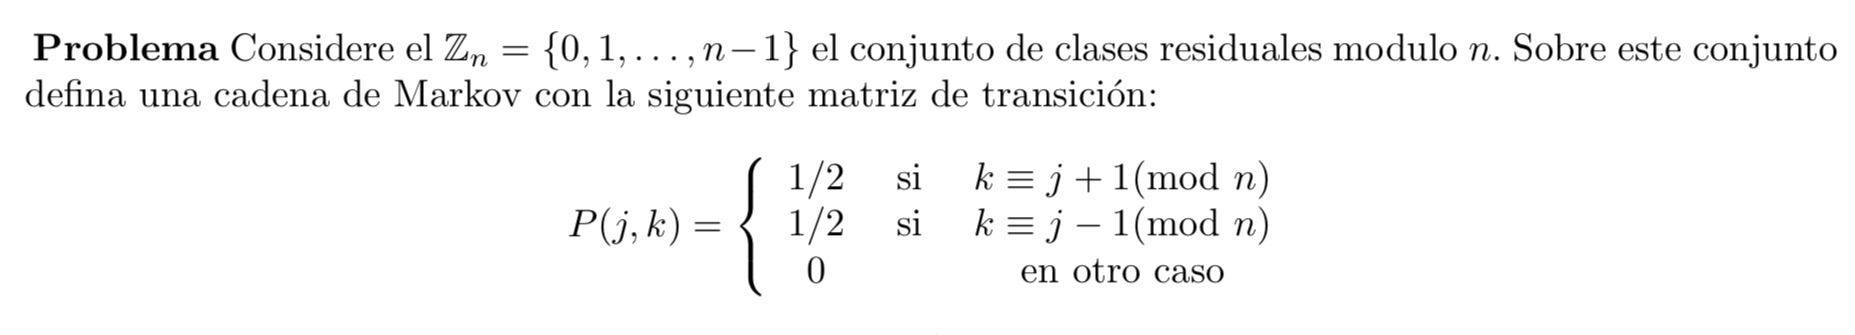

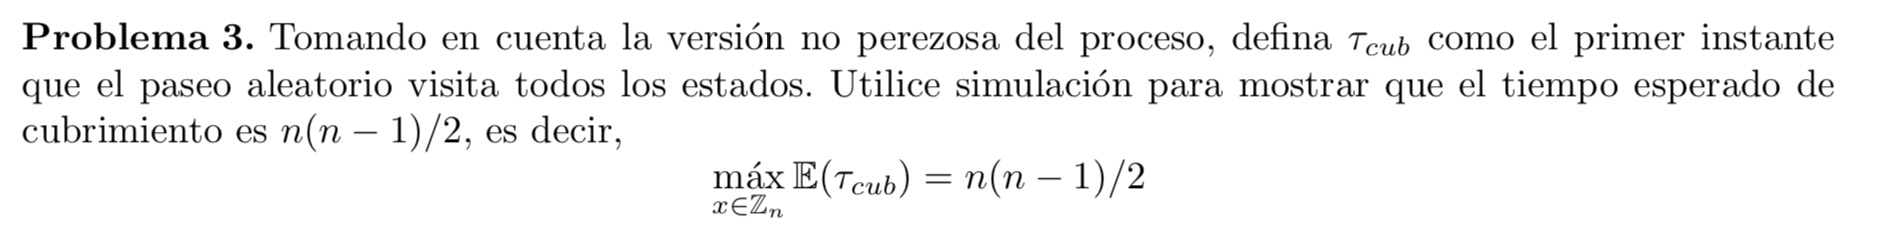

In [ ]:
def generateTransitionMatrix (n):
  """
  Returns the transition matrix for the Markov chain of a random work with n 
  states and an array of the states.

  Parameters:
  -----------
  n: int
  The number of states for the Markov chain.
  """
  Pij = np.zeros((n,n))
  states = []
  for i in range (n):
    states.append(i)
    if (i == 0):
      Pij[i][i+1] = 1/2
      Pij[i][n-1] = 1/2
    elif (i == (n-1)):
      Pij[i][0] = 1/2
      Pij[i][i-1] = 1/2
    else:
      Pij[i][i+1] = 1/2
      Pij[i][i-1] = 1/2
  return Pij, states
  
def nextStep(Pij, current, states):
  """
  Returns a next step for a Markov chain with a given transition matrix and the 
  current state.

  Parameters:
  -----------
  Pij: numpy matrix size n*n
  Transition matrix.

  current: int
  The state in which the Markov chain is currently.

  states: numpy array size n
  An array containing the states in the Markov chain.
  """
  Pi = Pij [current]
  next = np.random.choice(states, p = Pi)
  return next

def steps(Pij, n, states):
  """
  Returns the number of steps necessary to visit every state in a Markov chain, 
  given a transition matrix.

  Parameters:
  -----------
  Pij: numpy matrix size n*n
  Transition matrix.

  n: int
  Number of states in the Markov chain.

  states: numpy array size n
  An array containing the states in the Markov chain.
  """
  current = 0
  boo = True

  visitedStates = np.zeros(n)
  visitedStates[0] = 1
  cont = 0

  while boo:
    cont = cont+1
    next = nextStep(Pij, current, states)
    current = next
    visitedStates[current] = visitedStates[current] + 1
    if not (0 in visitedStates):
      boo = False
  
  return cont

def main():
  """
  Return a table with different states, the simulated tcub, the theorical tcub
  and the resulting error, for I simulations of each number of
  """
  I = 1000
  N0 = 3
  N = 15
  results = np.zeros((N-N0,4))
  for n in range(N0,N):
    teorico = n*(n-1)/2
    sum = 0
    for i in range(I):
      Pij, states = generateTransitionMatrix(n)
      a = steps(Pij, n, states)
      sum = sum + a
    simulado = sum/I
    results[n-N][0]=n
    results[n-N][1]=teorico
    results[n-N][2]=simulado
    results[n-N][3]=(teorico-simulado)/teorico
  return results

In [ ]:
results = main()
df = pd.DataFrame(results,columns=['Tamaño de la cadena', 'Tcub teórico', 'Tcub simulado','Error'])
df

,Tamaño de la cadena,Tcub teórico,Tcub simulado,Error
0,3.0,3.0,2.932,0.022667
1,4.0,6.0,5.928,0.012000
2,5.0,10.0,9.893,0.010700
3,6.0,15.0,14.711,0.019267
4,7.0,21.0,20.657,0.016333
5,8.0,28.0,28.398,-0.014214
6,9.0,36.0,36.001,-0.000028
7,10.0,45.0,45.237,-0.005267
8,11.0,55.0,55.659,-0.011982
9,12.0,66.0,68.022,-0.030636
